In [1]:
import pandas as pd
import numpy as np
import duckdb

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 15)

db = duckdb.connect() # No need to pass a file name, we will use a VIEW


In [2]:

db.execute('''
           DROP TABLE IF EXISTS SCHOOLS_ALL_DATA;
           CREATE TABLE SCHOOLS_ALL_DATA AS 
                SELECT 
                    'schools' Source,
                    s.URN, 
                    s.Region, 
                    s."London Borough",
                    s."School Name",
                    s."Type",
                    s."Overall Phase",
                    s."Full time equivalent number of pupils in school" "FTE Students",
                    s."% of pupils eligible for FSM" / 100 as "Percent Students FSM",
                    s."% of pupils with EHCP" / 100  "Percent Students EHCP",
                    s."% of pupils with SEN support" / 100 "Percent Students SEN",
                    s."% of pupils with English as an additional language" / 100 "Percent Students ESL",
                    s."FTE Number of teachers" "FTE Teachers",
                    s."Teaching Staff",
                    s."Supply Staff" "Supply Staff Costs",
                    s."Education support staff",
                    s."Other Staff Costs",
                    s."Staff Total" "Total Staff Costs",
                    s."Maintenance & Improvement" "Maintenance & Improvement Costs",
                    s."Energy",
                    s."Educational Supplies" "Total Costs of Educational Supplies",
                    s."Catering supplies",
                    s."Total Income",
                    s."Total Expenditure",
                    a.READPROG_19,
                    a.WRITPROG_19,
                    a.MATPROG_19,
                    a.READPROG_22,
                    a.WRITPROG_22,
                    a.MATPROG_22,
                    a.READPROG,
                    a.WRITPROG,
                    a.MATPROG
                    FROM parquet_scan('data/duck/schools_finance.parquet') as s
                    JOIN parquet_scan('data/duck/schools_attainment.parquet') as a
                    ON (s.URN = a.URN)
                    
                    WHERE "Overall Phase" = 'Primary'
                        AND "Did Not Supply flag" != 'DNS'
                        AND "FTE Students" > 0
                        AND "Period covered by return (months)" = 12
                UNION
                SELECT 
                    'academies' Source,
                    s.URN, 
                    s.Region, 
                    s."London Borough",
                    s."School Name",
                    s."Type",
                    s."Overall Phase",
                    s."Number of pupils in academy (FTE)"  "FTE Students",
                    (s."% of pupils eligible for FSM") / 100 as "Percent Students FSM",
                    (s."% of pupils with an EHCP") / 100  "Percent Students EHCP",
                    (s."% of pupils with SEN support") / 100 "Percent Students SEN",
                    (s."% of pupils with English as an additional language" / 100) "Percent Students ESL",
                    s."Number of teachers in academy (FTE)" "FTE Teachers",
                    s."Teaching Staff",
                    s."Supply Staff Costs",
                    s."Education support staff",
                    s."Other Staff Costs",
                    s."Total Staff Costs",
                    s."Maintenance & Improvement Costs",
                    s."Energy",
                    s."Total Costs of Educational Supplies",
                    s."Catering supplies",
                    s."Total Income",
                    s."Total Expenditure",
                    NULL READPROG_19,
                    NULL WRITPROG_19,
                    NULL MATPROG_19,
                    NULL READPROG_22,
                    NULL WRITPROG_22,
                    NULL MATPROG_22,
                    a.READ_PROGSCORE_EM_ADJ_WGTAVG READPROG,
                    a.WRIT_PROGSCORE_EM_ADJ_WGTAVG WRITPROG,
                    a.MAT_PROGSCORE_EM_ADJ_WGTAVG MATPROG
                    FROM parquet_scan('data/duck/academies_finance.parquet') as s
                    JOIN parquet_scan('data/duck/academies_attainment.parquet') as a
                    WHERE "Overall Phase" = 'Primary'
                        AND "Did Not Supply flag" is NULL
                        AND "FTE Students" > 0
                        AND "Period covered by return" = 12
                
           ''')

df = db.query("SELECT * FROM SCHOOLS_ALL_DATA").to_df()
#df['Progress'] = (df['READPROG_19'] + df['WRITPROG_19'] + df['MATPROG_19']) / 3
df


ParserException: Parser Error: syntax error at or near "WHERE"

In [ ]:
# staff costs. 
# Corellation between high quality teaching and 
# increased funding levels of attainment. 
# disadvantaged cohorts

# Efficiency is in staff. 80% fo funding. 
# Schools are not evidencing this. 
# Staff costs per pupil called out as a source of study. 

# MAT 

# Disadvantaged analysis add some. 

# 

In [ ]:
# Determine how financial prudance is measured in the education sector
# Total income, total expenditure, pupil numbers
 
df[['URN', 'School Name', 'Region', 'FTE Students', 'Total Income', 'Total Expenditure']]
df["Income per Student"] = df['Total Income'] / df['FTE Students']
df["Expenditure per Student"] = df['Total Expenditure'] / df['FTE Students']
df


Source       URN                    Region London Borough  \
0      academies  141375.0  Yorkshire and the Humber        Neither   
1      academies  147866.0                South East        Neither   
2      academies  147358.0                    London          Outer   
3      academies  137488.0             West Midlands        Neither   
4      academies  141685.0                    London          Inner   
...          ...       ...                       ...            ...   
16025    schools  112361.0                North West        Neither   
16026    schools  112362.0                North West        Neither   
16027    schools  112364.0                North West        Neither   
16028    schools  112406.0                North West        Neither   
16029    schools  112409.0                North West        Neither   

                                      School Name                    Type  \
0                       Dixons Manningham Academy     Academy sponsor led   
1                        Bearsted Primary Academy            Free schools   
2      Haberdashers' Aske's Crayford Temple Grove       Academy converter   
3                               The Priors School            Free schools   
4                         Langford Primary School     Academy sponsor led   
...                                           ...                     ...   
16025             Church Walk CofE Primary School  Voluntary aided school   
16026                St James' CofE Junior School  Voluntary aided school   
16027                         St Columba's School  Voluntary aided school   
16028                St Paul's CofE Junior School  Voluntary aided school   
16029                        Askam Village School       Foundation school   

      Overall Phase  ...    Energy  Total Costs of Educational Supplies  \
0           Primary  ...  21000.00                             86000.00   
1           Primary  ...  39000.00                             43000.00   
2           Primary  ...      0.00                            269000.00   
3           Primary  ...   8000.00                             57000.00   
4           Primary  ...  42000.00                            168000.00   
...             ...  ...       ...                                  ...   
16025       Primary  ...  15306.10                             65314.79   
16026       Primary  ...  26470.21                             63785.64   
16027       Primary  ...  25546.96                             65989.30   
16028       Primary  ...  12784.82                             32177.64   
16029       Primary  ...  33793.97                             65229.51   

       Catering supplies  Total Income  Total Expenditure  Income per Student  \
0               50000.00    2264000.00         2171000.00         5521.951220   
1               56000.00    1113000.00          872000.00         6288.135593   
2                   0.00    1373000.00         1410000.00         6341.801386   
3               16000.00     648000.00          624000.00         8100.000000   
4              102000.00    1868000.00         1897000.00         7116.190476   
...                  ...           ...                ...                 ...   
16025           16312.00     610911.21          641455.23         6170.820303   
16026           22017.36     820728.13          834569.34         6672.586423   
16027           64762.09    1166088.89         1241863.91         5744.280246   
16028            7646.90     518953.15          538918.21         7631.663971   
16029           42345.52     975777.04          968670.42         6041.963096   

       Expenditure per Student  
0                  5295.121951  
1                  4926.553672  
2                  6512.702079  
3                  7800.000000  
4                  7226.666667  
...                        ...  
16025              6479.345758  
16026              6785.116585  
16027              6117.556207  
16028              7925.2677

In [ ]:
df['Source'].unique()

array(['academies', 'schools'], dtype=object)

In [ ]:

df['IE Ratio'] = (df['Total Expenditure'] / df['Total Income'])

print('Mean IE Ratio:', df['IE Ratio'].mean())
print('Median IE Ratio:', df['IE Ratio'].median())
print('Min IE Ratio:', df['IE Ratio'].min())
print('Max IE Ratio:', df['IE Ratio'].max())

print('STD IE Ratio:', df['IE Ratio'].std())

Mean IE Ratio: inf
Median IE Ratio: 0.9949834764905585
Min IE Ratio: 0.0
Max IE Ratio: inf
STD IE Ratio: nan


/Users/andrewmccall/projects/tessa/.venv/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [ ]:
df['Student Buckets'] = pd.cut(df['FTE Students'], [0,200,400,600,800,1000,1200,1400,10000])
df["Student Buckets"] = df["Student Buckets"].apply(lambda interval: interval.left + 200)
def create_total_ratio(col, df):
    df[col + ' vs Total Expenditure Ratio'] = df[col] / df['Total Expenditure']
def create_staff_ratio(col, df):
    df[col + ' vs Staff Cost Ratio'] = df[col] / df['Total Expenditure']
def create_student_ratio(col, df):
    df[col + ' vs FTE Students Ratio'] = df[col] / df['FTE Students']

In [ ]:

df['Student Buckets'].unique()

[600, 200, 400, 800, 1000, 1400, 1200, 1600]
Categories (8, int64): [200 < 400 < 600 < 800 < 1000 < 1200 < 1400 < 1600]

In [ ]:
create_total_ratio('Teaching Staff', df)
create_total_ratio('Supply Staff Costs', df)
create_total_ratio('Education support staff', df)
create_total_ratio('Other Staff Costs', df)
create_total_ratio('Total Staff Costs', df)
create_total_ratio('Maintenance & Improvement Costs', df)
create_total_ratio('Energy', df)
create_total_ratio('Total Costs of Educational Supplies', df)
create_total_ratio('Catering supplies', df)

create_staff_ratio('Teaching Staff', df)
create_staff_ratio('Supply Staff Costs', df)
create_staff_ratio('Education support staff', df)
create_staff_ratio('Other Staff Costs', df)

create_student_ratio('Teaching Staff', df)
create_student_ratio('Supply Staff Costs', df)
create_student_ratio('Education support staff', df)
create_student_ratio('Other Staff Costs', df)
create_student_ratio('Total Staff Costs', df)
create_student_ratio('Maintenance & Improvement Costs', df)
create_student_ratio('Energy', df)
create_student_ratio('Total Costs of Educational Supplies', df)
create_student_ratio('Catering supplies', df)

<Axes: ylabel='Frequency'>

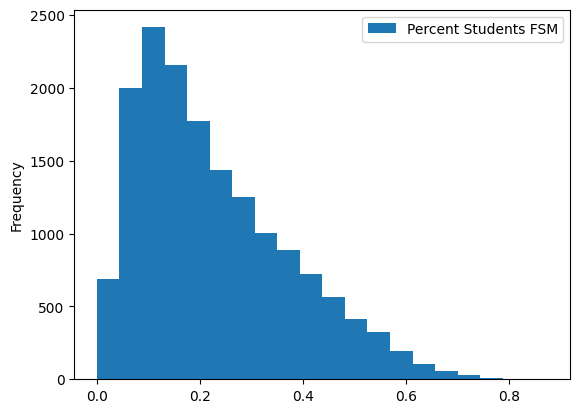

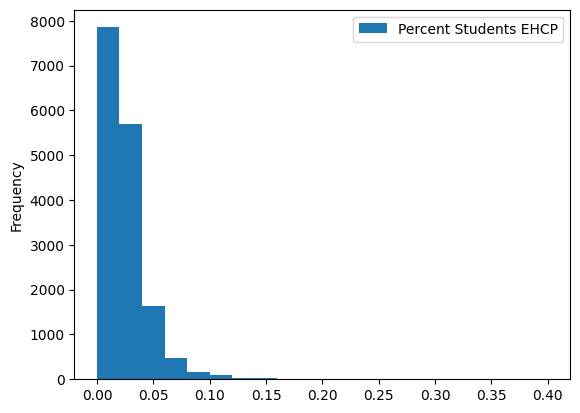

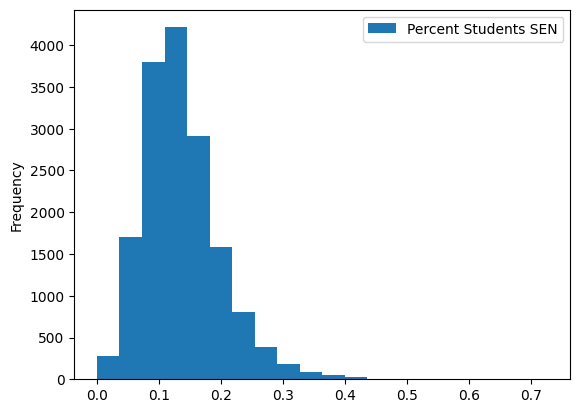

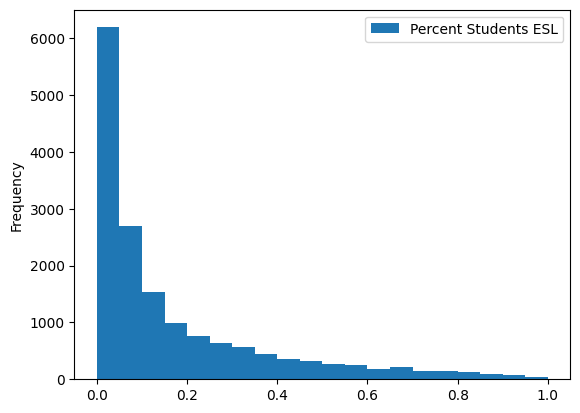

In [ ]:
df[['Percent Students FSM']].plot.hist(bins=20)
df[['Percent Students EHCP']].plot.hist(bins=20)
df[['Percent Students SEN']].plot.hist(bins=20)
df[['Percent Students ESL']].plot.hist(bins=20)

In [ ]:
def plot_student_groups(col): 
    df.plot.scatter(x='Percent Students FSM', y=col, c='FTE Students')
    print(f"Correlation '{col}' to 'Percent Students FSM': {df[col].corr(df['Percent Students FSM'])}" )
    df.plot.scatter(x='Percent Students EHCP', y=col, c='FTE Students')
    print(f"Correlation '{col}' to 'Percent Students EHCP':  {df[col].corr(df['Percent Students EHCP'])}" )
    df.plot.scatter(x='Percent Students SEN', y=col, c='FTE Students')
    print(f"Correlation '{col}' to 'Percent Students SEN':  {df[col].corr(df['Percent Students SEN'])}" )
    df.plot.scatter(x='Percent Students ESL', y=col, c='FTE Students')
    print(f"Correlation '{col}' to 'Percent Students ESL':  {df[col].corr(df['Percent Students ESL'])}" )    

Correlation 'Total Staff Costs vs Total Expenditure Ratio' to 'Percent Students FSM': -0.024363263324779522
Correlation 'Total Staff Costs vs Total Expenditure Ratio' to 'Percent Students EHCP':  0.061217923672541405
Correlation 'Total Staff Costs vs Total Expenditure Ratio' to 'Percent Students SEN':  -0.02252335470553462
Correlation 'Total Staff Costs vs Total Expenditure Ratio' to 'Percent Students ESL':  0.027558364816145594


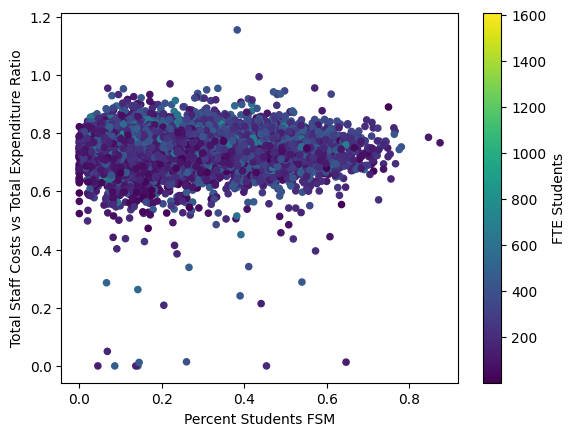

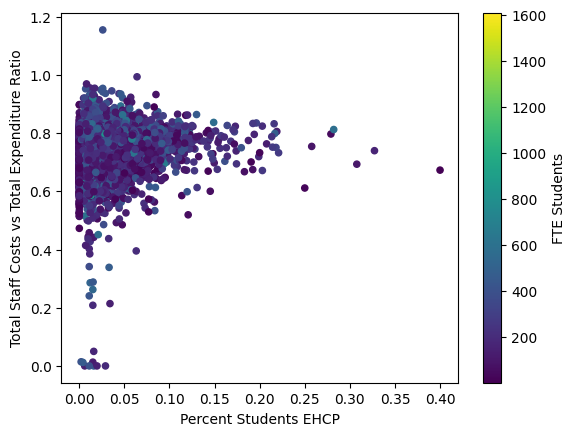

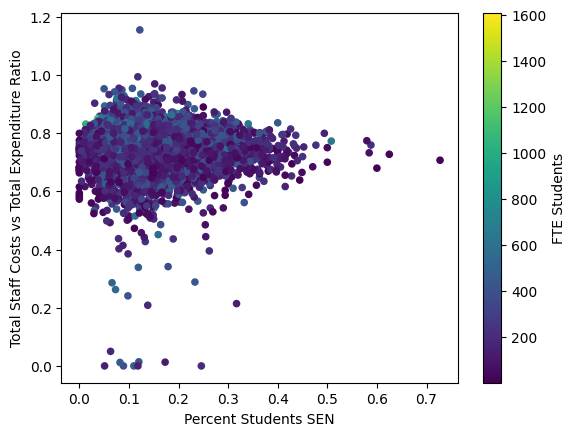

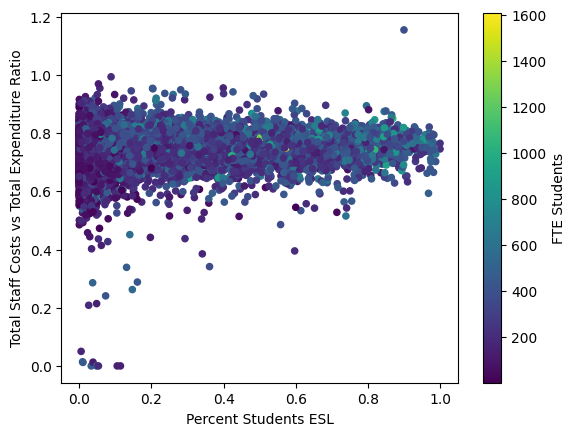

In [ ]:
plot_student_groups('Total Staff Costs vs Total Expenditure Ratio')


Correlation 'Teaching Staff vs Total Expenditure Ratio' to 'Percent Students FSM': -0.19820116833877724
Correlation 'Teaching Staff vs Total Expenditure Ratio' to 'Percent Students EHCP':  -0.13678681593494552
Correlation 'Teaching Staff vs Total Expenditure Ratio' to 'Percent Students SEN':  -0.10222845595258555
Correlation 'Teaching Staff vs Total Expenditure Ratio' to 'Percent Students ESL':  -0.1118138380412515
Correlation 'Teaching Staff vs Staff Cost Ratio' to 'Percent Students FSM': -0.19820116833877724
Correlation 'Teaching Staff vs Staff Cost Ratio' to 'Percent Students EHCP':  -0.13678681593494552
Correlation 'Teaching Staff vs Staff Cost Ratio' to 'Percent Students SEN':  -0.10222845595258555
Correlation 'Teaching Staff vs Staff Cost Ratio' to 'Percent Students ESL':  -0.1118138380412515


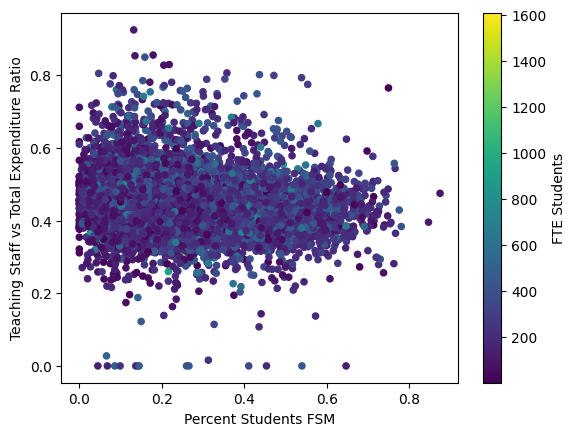

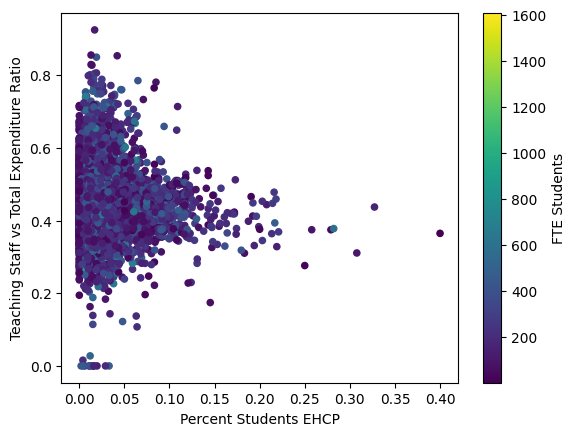

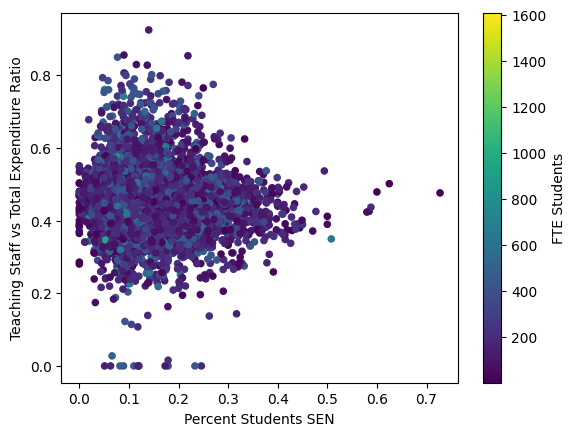

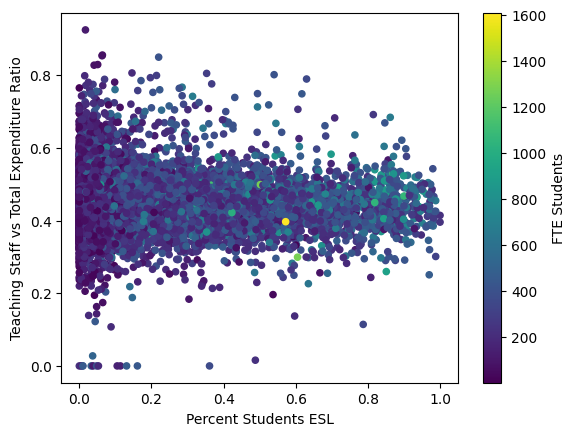

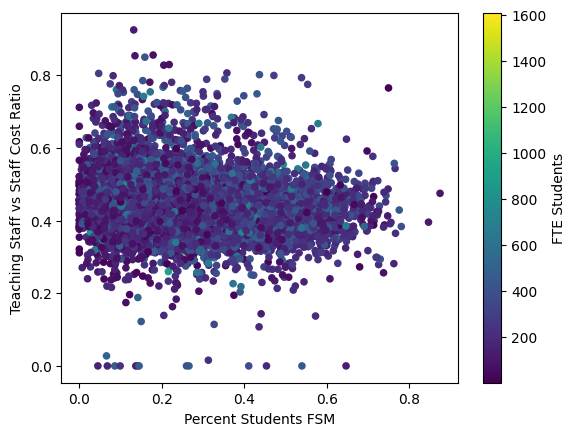

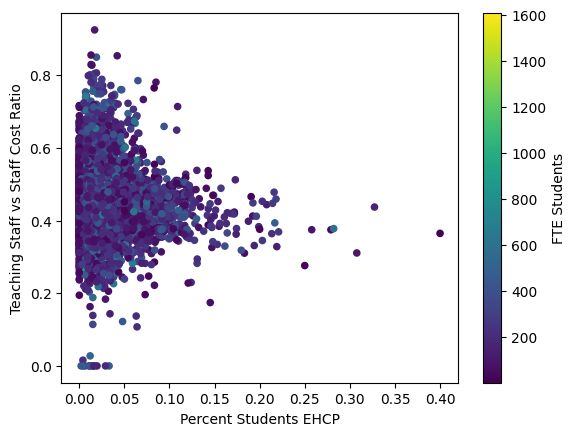

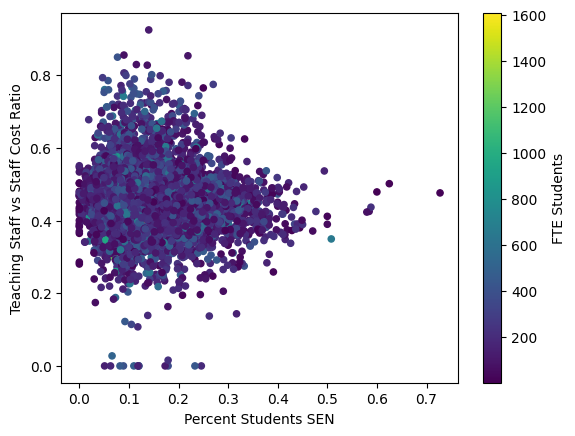

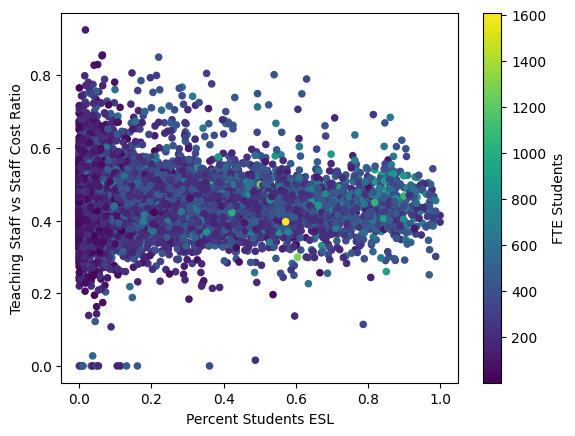

In [ ]:
plot_student_groups('Teaching Staff vs Total Expenditure Ratio')
plot_student_groups('Teaching Staff vs Staff Cost Ratio')

Correlation 'Education support staff vs Total Expenditure Ratio' to 'Percent Students FSM': 0.1718421461274103
Correlation 'Education support staff vs Total Expenditure Ratio' to 'Percent Students EHCP':  0.22783336277331354
Correlation 'Education support staff vs Total Expenditure Ratio' to 'Percent Students SEN':  0.08023909497709505
Correlation 'Education support staff vs Total Expenditure Ratio' to 'Percent Students ESL':  0.09735837388275545
Correlation 'Education support staff vs Staff Cost Ratio' to 'Percent Students FSM': 0.1718421461274103
Correlation 'Education support staff vs Staff Cost Ratio' to 'Percent Students EHCP':  0.22783336277331354
Correlation 'Education support staff vs Staff Cost Ratio' to 'Percent Students SEN':  0.08023909497709505
Correlation 'Education support staff vs Staff Cost Ratio' to 'Percent Students ESL':  0.09735837388275545


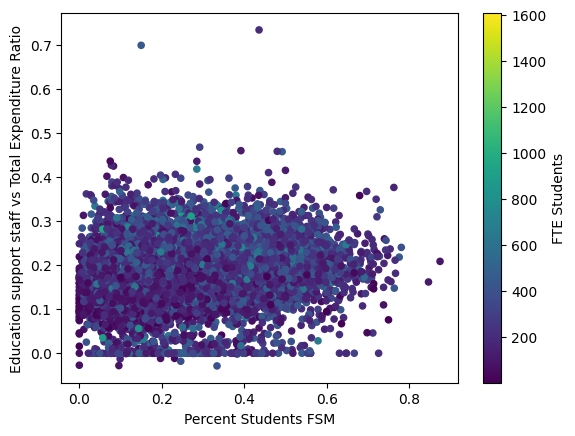

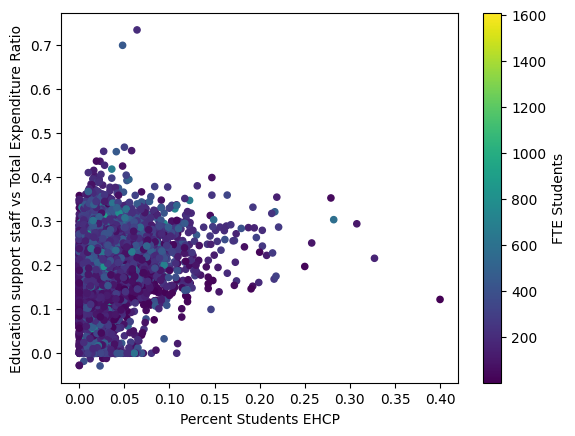

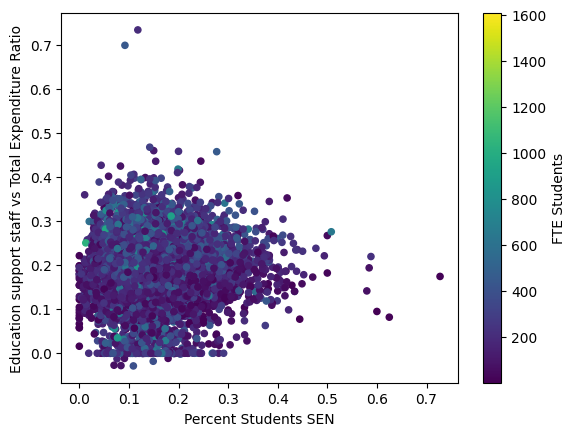

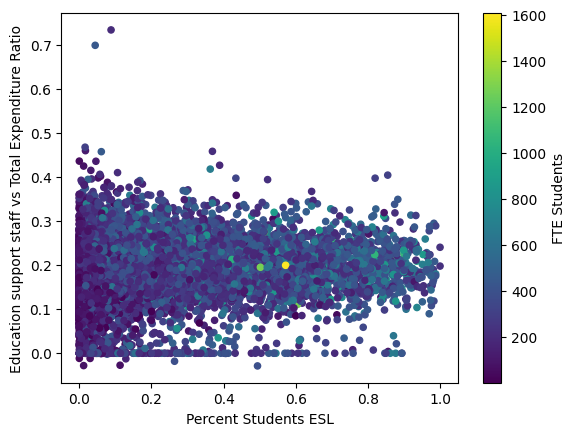

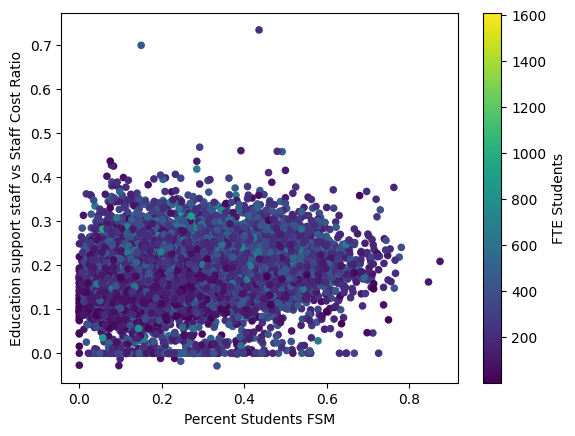

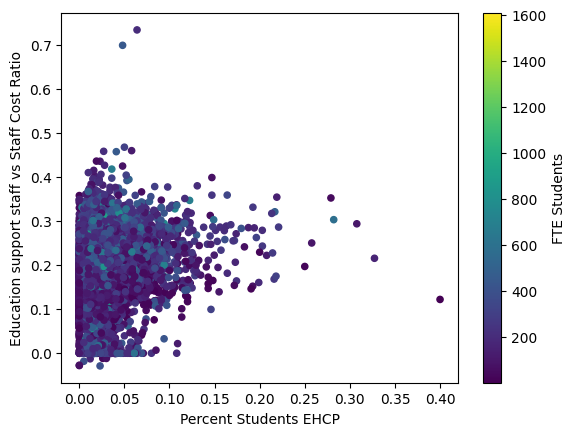

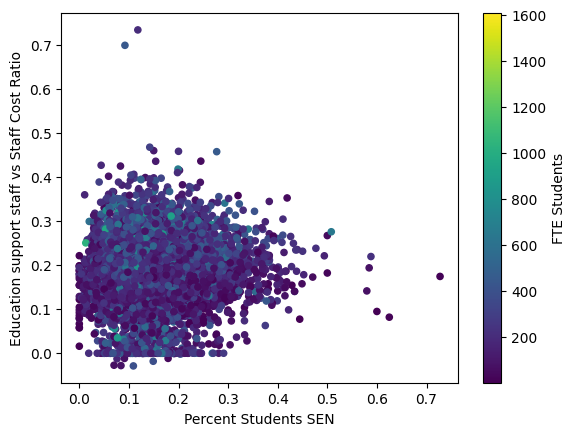

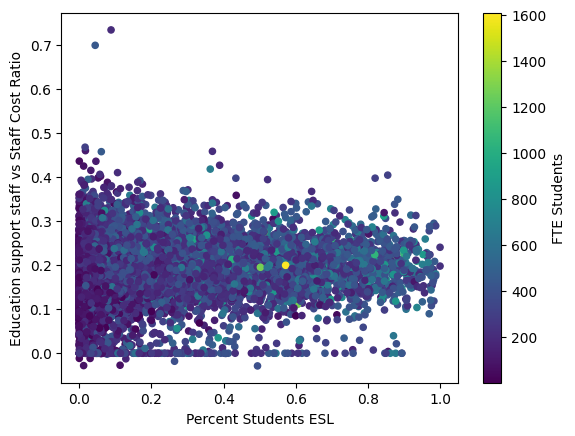

In [ ]:
plot_student_groups('Education support staff vs Total Expenditure Ratio')
plot_student_groups('Education support staff vs Staff Cost Ratio')

Correlation 'Other Staff Costs vs Total Expenditure Ratio' to 'Percent Students FSM': -0.05208758810394027


Correlation 'Other Staff Costs vs Total Expenditure Ratio' to 'Percent Students EHCP':  -0.044651185541504185
Correlation 'Other Staff Costs vs Total Expenditure Ratio' to 'Percent Students SEN':  -0.04099682209130986
Correlation 'Other Staff Costs vs Total Expenditure Ratio' to 'Percent Students ESL':  -0.031838138601630414
Correlation 'Other Staff Costs vs Staff Cost Ratio' to 'Percent Students FSM': -0.05208758810394027
Correlation 'Other Staff Costs vs Staff Cost Ratio' to 'Percent Students EHCP':  -0.044651185541504185
Correlation 'Other Staff Costs vs Staff Cost Ratio' to 'Percent Students SEN':  -0.04099682209130986
Correlation 'Other Staff Costs vs Staff Cost Ratio' to 'Percent Students ESL':  -0.031838138601630414


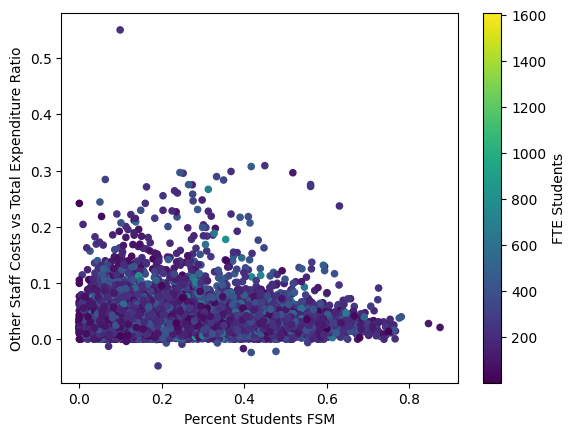

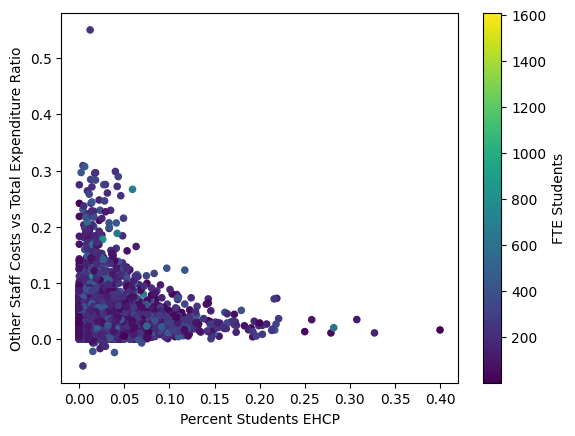

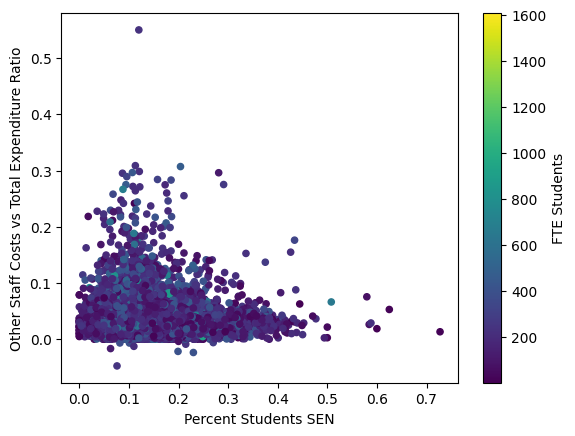

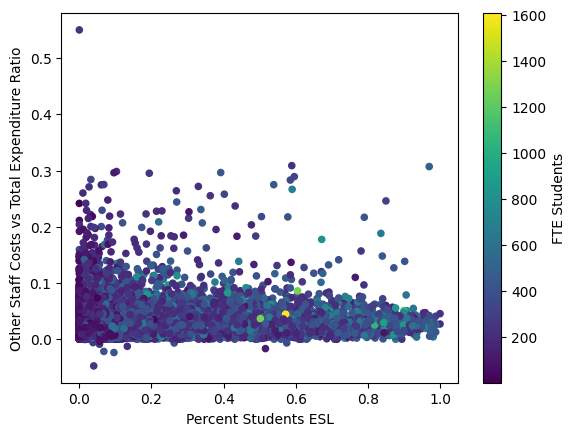

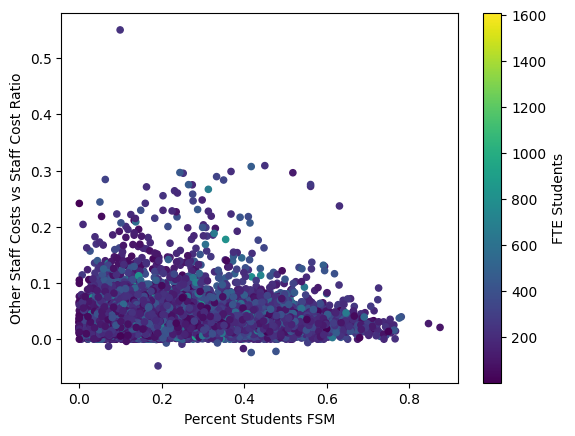

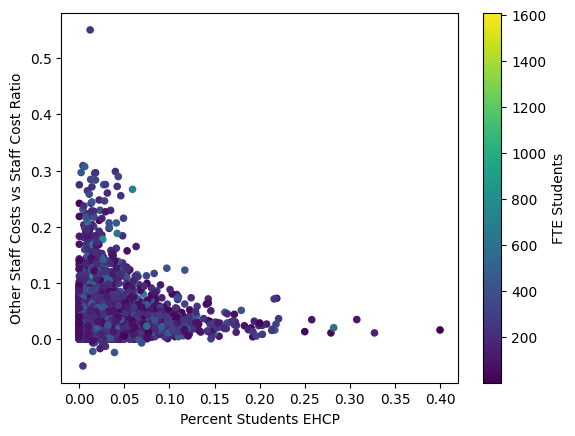

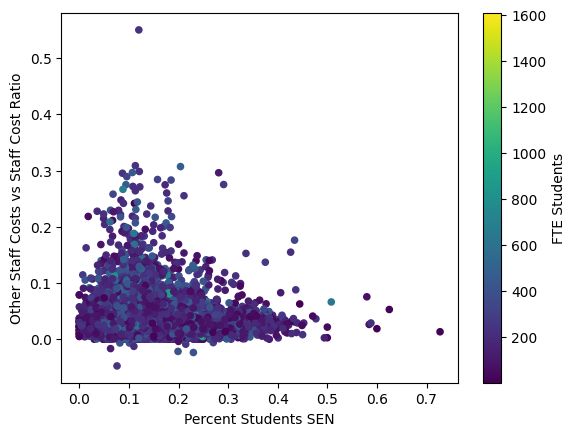

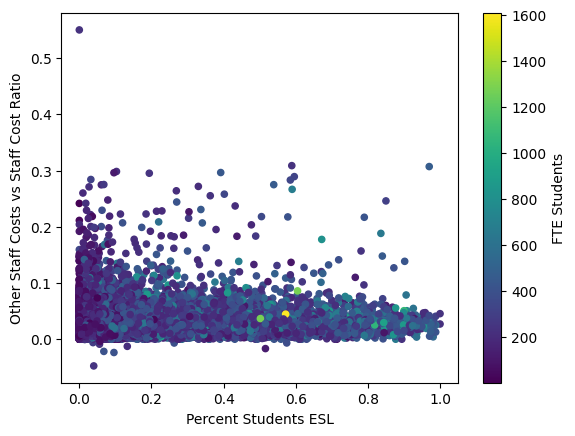

In [ ]:
plot_student_groups('Other Staff Costs vs Total Expenditure Ratio')
plot_student_groups('Other Staff Costs vs Staff Cost Ratio')

Correlation 'Total Costs of Educational Supplies vs Total Expenditure Ratio' to 'Percent Students FSM': -0.12265479060201183


Correlation 'Total Costs of Educational Supplies vs Total Expenditure Ratio' to 'Percent Students EHCP':  -0.06500017568522358
Correlation 'Total Costs of Educational Supplies vs Total Expenditure Ratio' to 'Percent Students SEN':  -0.02916865775348251
Correlation 'Total Costs of Educational Supplies vs Total Expenditure Ratio' to 'Percent Students ESL':  -0.17090704662395406


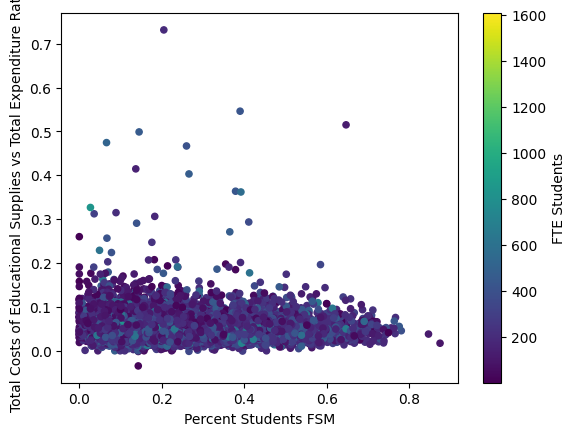

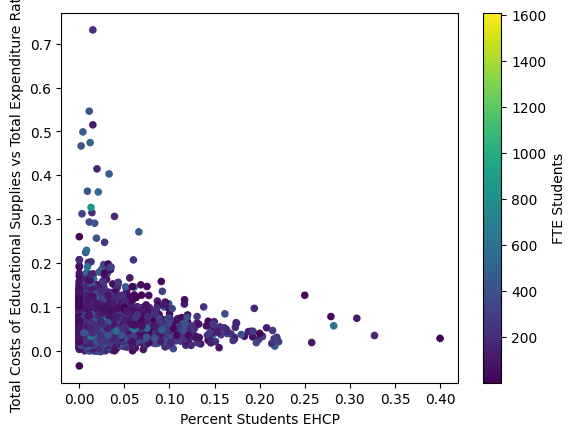

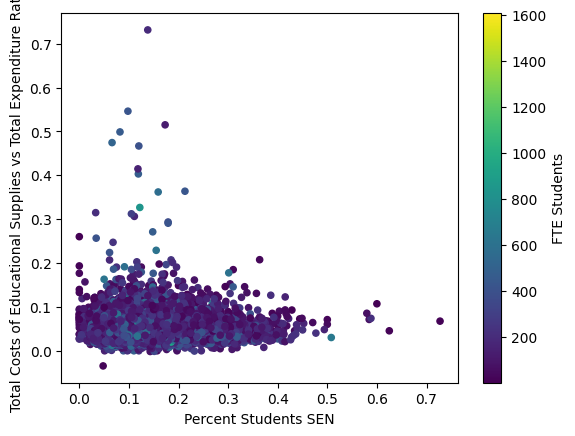

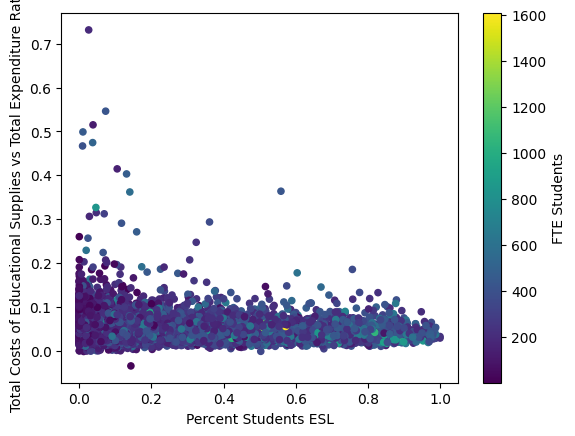

In [ ]:
plot_student_groups('Total Costs of Educational Supplies vs Total Expenditure Ratio')

<Axes: xlabel='Total Income', ylabel='Total Expenditure'>

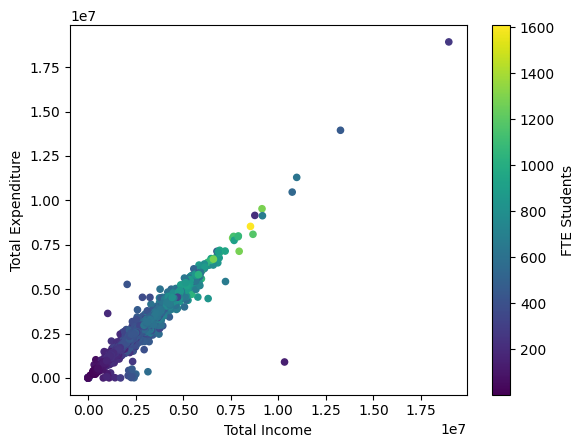

In [ ]:
df.plot.scatter(x='Total Income', y='Total Expenditure', c='FTE Students')

In [ ]:
df['Total Expenditure'].corr(df['Total Income'])

0.986173014129849

In [ ]:
df['Classroom Staff'] = df['Teaching Staff'] + df['Supply Staff Costs'] + df['Education support staff']
df['Non Classroom Staff'] = df['Total Staff Costs'] - df['Classroom Staff']
df[['URN', 'School Name', 'Classroom Staff', 'Total Staff Costs', 'Other Staff Costs']]

URN                                 School Name  Classroom Staff  \
0      141375.0                   Dixons Manningham Academy       1571000.00   
1      147866.0                    Bearsted Primary Academy        627000.00   
2      147358.0  Haberdashers' Aske's Crayford Temple Grove        706000.00   
3      137488.0                           The Priors School        424000.00   
4      141685.0                     Langford Primary School       1262000.00   
...         ...                                         ...              ...   
16025  112361.0             Church Walk CofE Primary School        457069.77   
16026  112362.0                St James' CofE Junior School        527162.01   
16027  112364.0                         St Columba's School        822538.21   
16028  112406.0                St Paul's CofE Junior School        389682.61   
16029  112409.0                        Askam Village School        699672.44   

       Total Staff Costs  Other Staff Costs  
0             1723000.00           44000.00  
1              688000.00           26000.00  
2             1023000.00           17000.00  
3              467000.00           10000.00  
4             1408000.00           10000.00  
...                  ...                ...  
16025          500503.19           20225.10  
16026          599682.95           27026.02  
16027          961384.89           93720.84  
16028          427529.78           14436.96  
16029          744639.83            8535.02  

[16030 rows x 5 columns]

<Axes: xlabel='Classroom Staff', ylabel='Non Classroom Staff'>

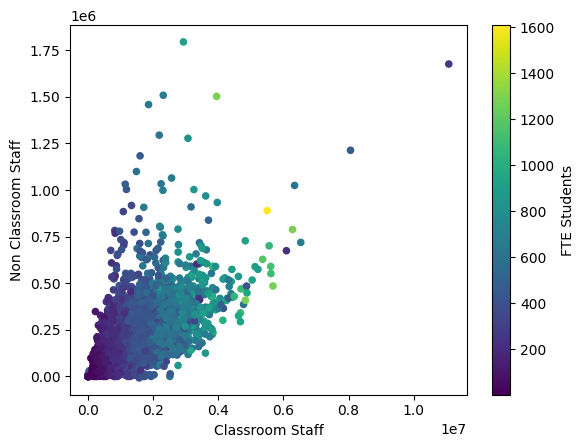

In [ ]:
df.plot.scatter(x='Classroom Staff', y='Non Classroom Staff', c='FTE Students')

In [ ]:
df['Non Classroom Staff'].corr(df['Total Expenditure'])

0.7776812806726126

<Axes: xlabel='Total Expenditure', ylabel='Teaching Staff'>

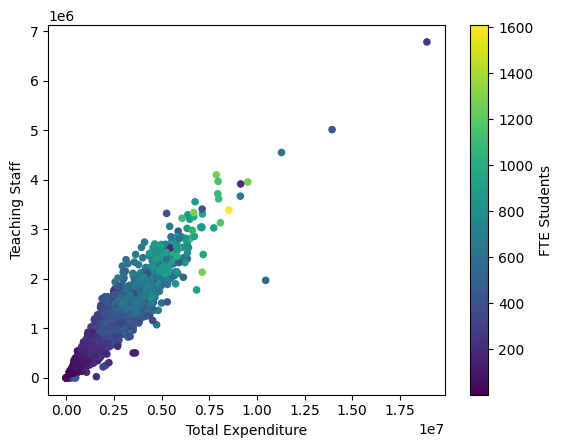

In [ ]:
df.plot.scatter(x='Total Expenditure', y='Teaching Staff', c='FTE Students')

In [ ]:
df['Teaching Staff'].corr(df['Total Expenditure'])

0.9643576126956478

In [ ]:
def show_stats (col):
    agg_func_math = {
        col + ' vs Total Expenditure Ratio':
        ['mean', 'median', 'min', 'max', 'std', 'var']
    }
    return df[df[col + ' vs Total Expenditure Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)

show_stats('Teaching Staff')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_55526/1363793428.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' vs Total Expenditure Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Teaching Staff vs Total Expenditure Ratio                     \
                                                     mean median   min   max   
Student Buckets                                                                
200                                                  0.46   0.46  0.14  0.93   
400                                                  0.45   0.45  0.02  0.81   
600                                                  0.46   0.46  0.03  0.85   
800                                                  0.46   0.46  0.23  0.77   
1000                                                 0.46   0.46  0.26  0.58   
1200                                                 0.46   0.46  0.39  0.53   
1400                                                 0.43   0.46  0.30  0.52   
1600                                                 0.40   0.40  0.40  0.40   

                             
                  std   var  
Student Buckets              
200              0.07  0.00  
400              0.06  0.00  
600              0.06  0.00  
800              0.06  0.00  
1000             0.06  0.00  
1200             0.04  0.00  
1400             0.10  0.01  
1600              NaN   NaN

<Axes: xlabel='Total Expenditure', ylabel='Education support staff'>

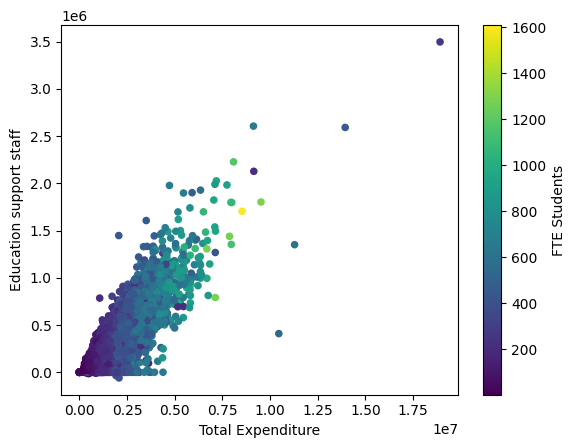

In [ ]:

df.plot.scatter(x='Total Expenditure', y='Education support staff', c='FTE Students')

In [ ]:
df['Education support staff'].corr(df['Total Expenditure'])

0.8832946351342102

In [ ]:
show_stats('Education support staff')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_55526/1363793428.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' vs Total Expenditure Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Education support staff vs Total Expenditure Ratio         \
                                                              mean median   
Student Buckets                                                             
200                                                           0.17   0.17   
400                                                           0.19   0.19   
600                                                           0.20   0.20   
800                                                           0.20   0.20   
1000                                                          0.19   0.19   
1200                                                          0.22   0.22   
1400                                                          0.17   0.19   
1600                                                          0.20   0.20   

                                        
                  min   max   std  var  
Student Buckets                         
200              0.00  0.46  0.05  0.0  
400              0.00  0.73  0.05  0.0  
600              0.00  0.70  0.05  0.0  
800              0.01  0.42  0.05  0.0  
1000             0.04  0.32  0.05  0.0  
1200             0.16  0.28  0.03  0.0  
1400             0.11  0.20  0.04  0.0  
1600             0.20  0.20   NaN  NaN

<Axes: xlabel='Total Expenditure', ylabel='Total Staff Costs'>

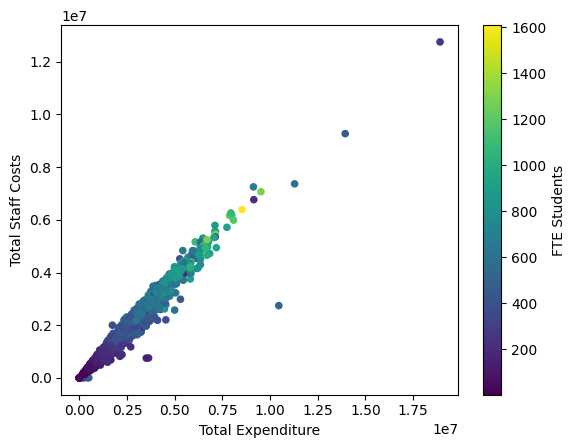

In [ ]:

df.plot.scatter(x='Total Expenditure', y='Total Staff Costs', c='FTE Students')

In [ ]:
df['Total Staff Costs'].corr(df['Total Expenditure'])

0.9899126665175879

In [ ]:
show_stats('Total Staff Costs')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_55526/1363793428.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' vs Total Expenditure Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Total Staff Costs vs Total Expenditure Ratio               \
                                                        mean median   min   
Student Buckets                                                             
200                                                     0.74   0.75  0.01   
400                                                     0.76   0.76  0.34   
600                                                     0.76   0.77  0.01   
800                                                     0.77   0.77  0.52   
1000                                                    0.76   0.77  0.59   
1200                                                    0.78   0.77  0.72   
1400                                                    0.77   0.77  0.74   
1600                                                    0.75   0.75  0.75   

                                  
                  max   std  var  
Student Buckets                   
200              0.97  0.05  0.0  
400              1.15  0.05  0.0  
600              0.95  0.05  0.0  
800              0.92  0.05  0.0  
1000             0.87  0.05  0.0  
1200             0.85  0.04  0.0  
1400             0.78  0.02  0.0  
1600             0.75   NaN  NaN

<Axes: xlabel='Total Expenditure', ylabel='Maintenance & Improvement Costs'>

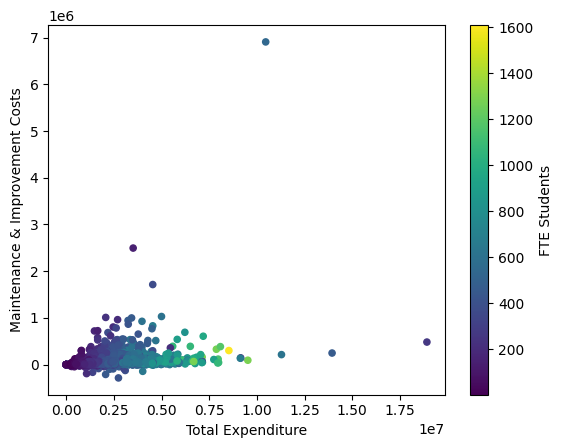

In [ ]:

df.plot.scatter(x='Total Expenditure', y='Maintenance & Improvement Costs', c='FTE Students')

In [ ]:
df['Maintenance & Improvement Costs'].corr(df['Total Expenditure'])

0.3095189580841722

In [ ]:
show_stats('Maintenance & Improvement Costs')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_55526/1363793428.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' vs Total Expenditure Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Maintenance & Improvement Costs vs Total Expenditure Ratio  \
                                                                      mean   
Student Buckets                                                              
200                                                           0.02           
400                                                           0.02           
600                                                           0.02           
800                                                           0.02           
1000                                                          0.02           
1200                                                          0.02           
1400                                                          0.02           
1600                                                          0.04           

                                               
                median   min   max   std  var  
Student Buckets                                
200               0.02  0.00  0.71  0.02  0.0  
400               0.02  0.00  0.49  0.02  0.0  
600               0.02  0.00  0.66  0.02  0.0  
800               0.01  0.00  0.23  0.02  0.0  
1000              0.01  0.00  0.11  0.02  0.0  
1200              0.01  0.00  0.07  0.02  0.0  
1400              0.02  0.01  0.04  0.02  0.0  
1600              0.04  0.04  0.04   NaN  NaN

<Axes: xlabel='Total Expenditure', ylabel='Energy'>

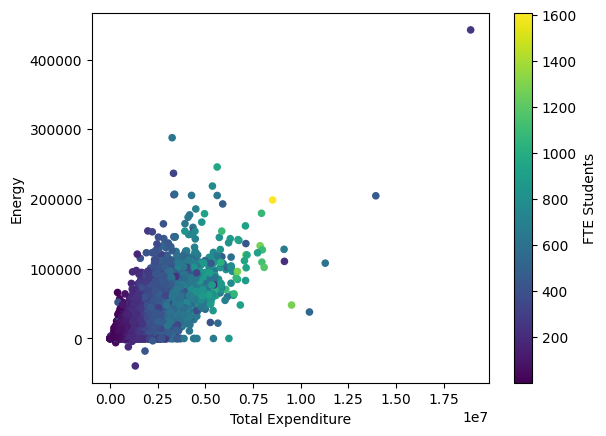

In [ ]:

df.plot.scatter(x='Total Expenditure', y='Energy', c='FTE Students')

In [ ]:
df['Energy'].corr(df['Total Expenditure'])

0.709985797458845

In [ ]:
df['Energy'].corr(df['FTE Students'])

0.6118840196477231

In [ ]:
show_stats('Energy')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_55526/1363793428.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' vs Total Expenditure Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Energy vs Total Expenditure Ratio                           \
                                             mean median   min   max   std   
Student Buckets                                                              
200                                          0.02   0.02  0.00  0.16  0.01   
400                                          0.02   0.02  0.00  0.08  0.01   
600                                          0.02   0.02  0.00  0.12  0.01   
800                                          0.02   0.01  0.00  0.09  0.01   
1000                                         0.02   0.02  0.01  0.04  0.01   
1200                                         0.02   0.01  0.01  0.03  0.00   
1400                                         0.01   0.02  0.01  0.02  0.01   
1600                                         0.02   0.02  0.02  0.02   NaN   

                      
                 var  
Student Buckets       
200              0.0  
400              0.0  
600              0.0  
800              0.0  
1000             0.0  
1200             0.0  
1400             0.0  
1600             NaN

<Axes: xlabel='Total Expenditure', ylabel='Total Costs of Educational Supplies'>

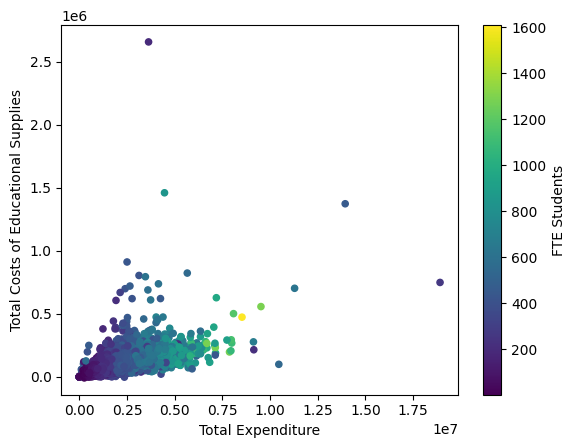

In [ ]:

df.plot.scatter(x='Total Expenditure', y='Total Costs of Educational Supplies', c='FTE Students')

In [ ]:
df['Total Costs of Educational Supplies'].corr(df['Total Expenditure'])

0.6583881288861513

In [ ]:
df['Total Costs of Educational Supplies'].corr(df['FTE Students'])

0.612936087830409

In [ ]:
show_stats('Total Costs of Educational Supplies')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_55526/1363793428.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' vs Total Expenditure Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Total Costs of Educational Supplies vs Total Expenditure Ratio  \
                                                                          mean   
Student Buckets                                                                  
200                                                           0.06               
400                                                           0.05               
600                                                           0.05               
800                                                           0.05               
1000                                                          0.04               
1200                                                          0.04               
1400                                                          0.04               
1600                                                          0.06               

                                               
                median   min   max   std  var  
Student Buckets                                
200               0.05  0.00  0.73  0.03  0.0  
400               0.05  0.00  0.31  0.02  0.0  
600               0.05  0.01  0.55  0.03  0.0  
800               0.04  0.01  0.23  0.02  0.0  
1000              0.04  0.02  0.33  0.03  0.0  
1200              0.03  0.03  0.06  0.01  0.0  
1400              0.04  0.03  0.06  0.01  0.0  
1600              0.06  0.06  0.06   NaN  NaN

<Axes: xlabel='Total Expenditure', ylabel='Catering supplies'>

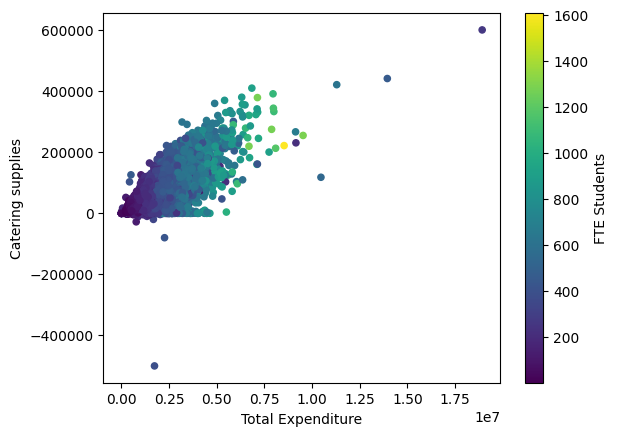

In [ ]:

df.plot.scatter(x='Total Expenditure', y='Catering supplies', c='FTE Students')

In [ ]:
df['Catering supplies'].corr(df['Total Expenditure'])

0.7702775046634902

In [ ]:
df['Catering supplies'].corr(df['FTE Students'])

0.7024340014352349

In [ ]:
show_stats("Catering supplies")

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_55526/1363793428.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' vs Total Expenditure Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Catering supplies vs Total Expenditure Ratio               \
                                                        mean median   min   
Student Buckets                                                             
200                                                     0.04   0.04  0.00   
400                                                     0.04   0.04  0.00   
600                                                     0.04   0.04  0.00   
800                                                     0.04   0.04  0.00   
1000                                                    0.04   0.04  0.00   
1200                                                    0.03   0.03  0.00   
1400                                                    0.04   0.03  0.03   
1600                                                    0.03   0.03  0.03   

                                  
                  max   std  var  
Student Buckets                   
200              0.60  0.02  0.0  
400              0.11  0.01  0.0  
600              0.25  0.02  0.0  
800              0.09  0.01  0.0  
1000             0.07  0.01  0.0  
1200             0.05  0.02  0.0  
1400             0.05  0.01  0.0  
1600             0.03   NaN  NaN